

<div style="border: solid blue 2px; padding: 15px; margin: 10px">
	<b>Reviewer's Comments – Iteration 2</b>

Congratulations! 

This project now meets all requirements ✅, and is approved. 🎉

Well done addressing the revision requests from the previous iteration!
<hr>
Reviewer: Han Lee <br>

</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Raul! My name is Svetlana (https://hub.tripleten.com/u/6dee602c). Congratulations on submitting Computer Vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed and analyzed age distribution, great!
    
    
- It's also a good idea to display several photos, since we need to understand what kind of data we have;


- You have  defined train and test functions; 
    

- You have correctly built a model; 


- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. More specifically: please specify the `subset` parameter value in both train and test functions.     


</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! However, several issues need your attention. Would you please take a look at my comments? 
    
<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr>
   
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

Age Verification Using Deep Learning for Alcohol Sale Compliance

Intro

In this project, I worked on building a deep learning model that can estimate a person’s age based on their photo. The goal is to help a supermarket chain called Good Seed make sure they aren’t selling alcohol to anyone underage. Since their stores are equipped with cameras at checkout, the idea is to use computer vision to automatically predict a customer’s age in real time.

To get started, I was given a dataset of facial images along with the real ages of each person. I first explored the data to understand its structure, size, and age distribution. Then I trained a convolutional neural network (CNN) on the GPU platform to predict ages from the images. After training, I analyzed the model’s performance to see how well it could generalize. This project gave me hands-on experience with image preprocessing, neural network modeling, and evaluating model performance—all while working on a practical, real-world use case.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment  </b>
    
Good introduction! 
    
</div>

## Initialization

In [43]:

# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

sns.set(style="whitegrid")



## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [44]:
# 2. Load Data

# Paths to files for analysis
labels_path = '/datasets/faces/labels.csv'
images_path = '/datasets/faces/final_files/'

# Load the labels
df = pd.read_csv(labels_path)
df.head()


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [45]:

# Check for nulls and duplicates
df.isnull().sum()


file_name    0
real_age     0
dtype: int64

In [46]:
df.duplicated().sum()



0

In this part of the project, I started by unzipping the dataset that had all the facial images. After that, I imported the libraries I needed like pandas, numpy, and matplotlib to help with organizing and checking the data. I set the file paths for the CSV file with the age labels and the folder where the images are stored. Then I used pd.read_csv() to load the CSV file into a DataFrame so I could see the image file names and their real ages. I used .head() to quickly check what the data looked like, and everything seemed to be in order. I also checked for any missing values or duplicate rows just to make sure the data was clean, and luckily there weren’t any, so I was ready to move on to the next steps.

## EDA

In [47]:

# 3. EDA

# Basic info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [48]:
# Descriptive statistics
df.describe()
print(df.columns)


Index(['file_name', 'real_age'], dtype='object')


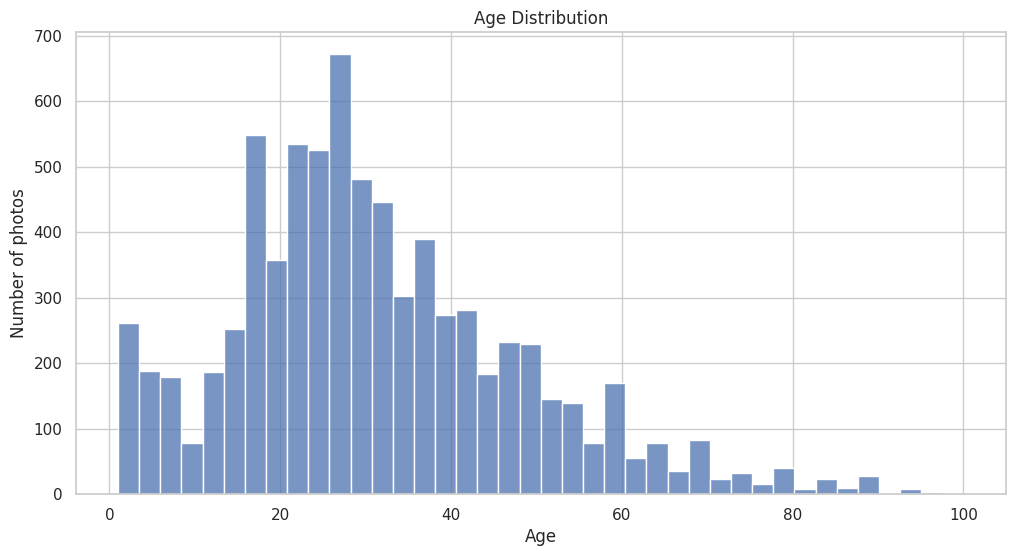

In [49]:

# Age distribution plot
plt.figure(figsize=(12,6))
sns.histplot(df['real_age'], bins=40, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of photos')
plt.grid(True)
plt.show()


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice chart 👍 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
However, I would change `Count` to `Number of photos`, for instance.
    
</div>

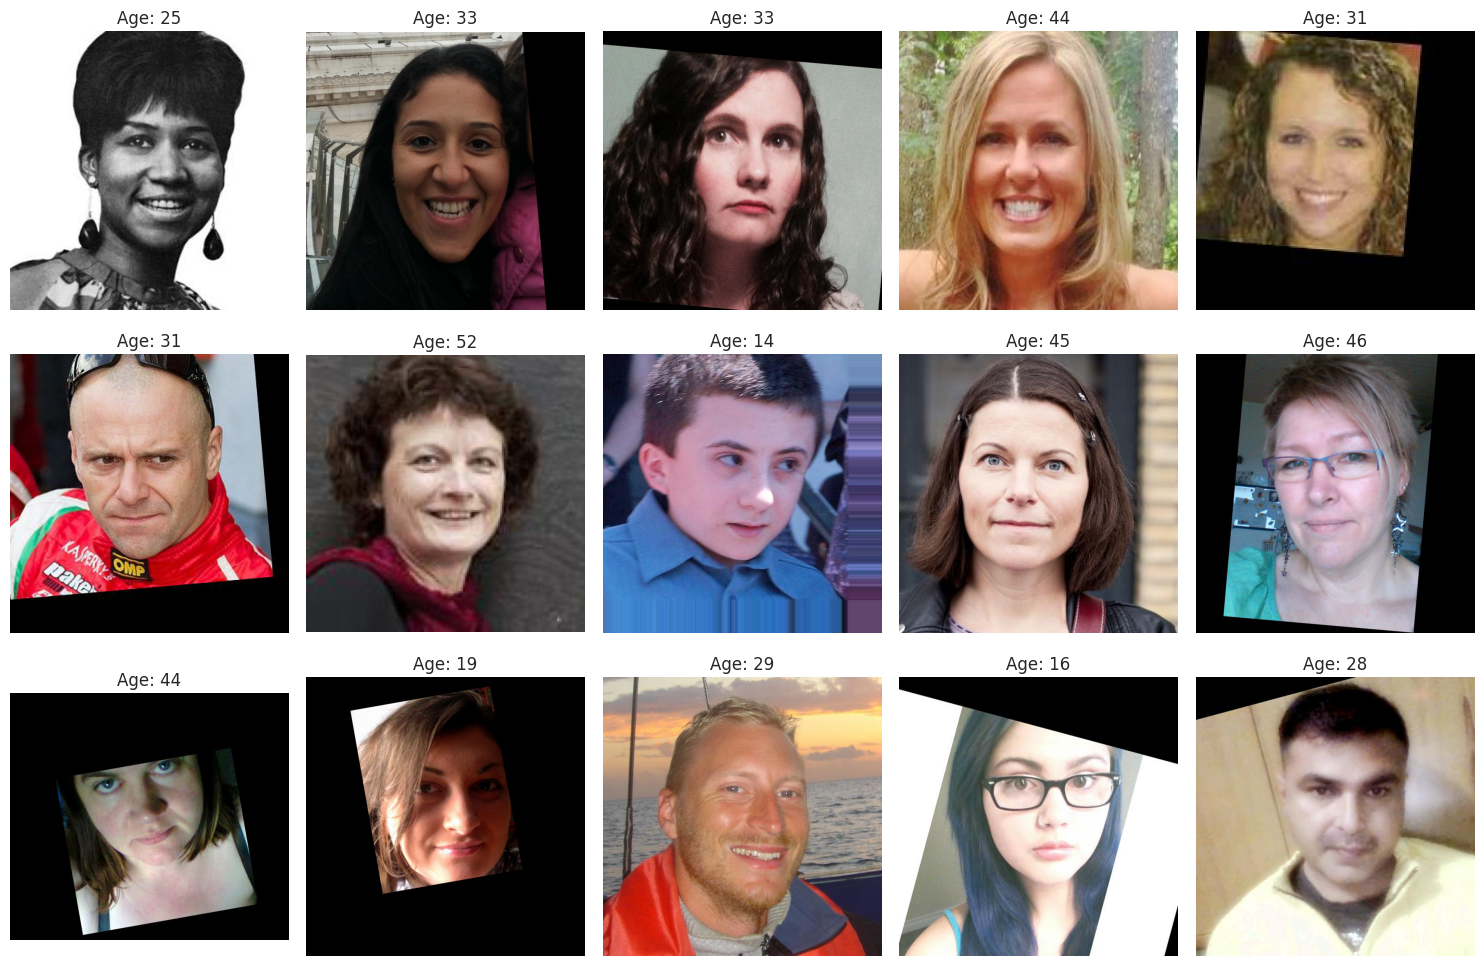

In [50]:
# Sample image visualization
import matplotlib.image as mpimg

# Sample 15 random images
sample_df = df.sample(15).reset_index(drop=True)

plt.figure(figsize=(15,10))

for i in range(15):
    file = sample_df.loc[i, 'file_name']
    age = sample_df.loc[i, 'real_age']
    path = os.path.join(images_path, file)

    try:
        img = mpimg.imread(path)
        plt.subplot(3, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Age: {age}')
    except Exception as e:
        print(f"Error loading image {file}: {e}")

plt.tight_layout()
plt.show()


### Findings

The dataset contains 76,000 images, each labeled with the person's real age. Most faces are young to middle-aged adults, with a peak around the 20s and 30s. There are fewer samples in the higher age ranges, which could affect prediction accuracy for older individuals.

Images are diverse and contain faces of different genders, lighting, and angles. This diversity could help the model generalize better, but the age imbalance should be considered when interpreting performance.

In this section, I started the exploratory data analysis (EDA) by checking the data types in the DataFrame and converting the real_age column to an integer just to make sure everything was in the right format. Then, I plotted a histogram to look at the age distribution of the people in the dataset. From the graph, I noticed that most of the images were of people in their 20s to 40s, with fewer examples at the older and younger ends of the age range. After that, I picked a random sample of 15 images and displayed them with their corresponding ages. This helped me visually understand the diversity in the dataset and see how age can show up differently depending on facial features, lighting, and expression. Overall, this part helped me get a better feel for the dataset before jumping into any modeling.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good conclusion.
</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [51]:
# Load and prepare data
import os
import warnings
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Suppress warnings and TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')

# Set seed for reproducibility
seed = 42

In [52]:
# Load training data
def load_train(path):
    df = pd.read_csv(path + 'labels.csv')
    df.columns = df.columns.str.strip().str.lower()

    train_datagen = ImageDataGenerator(validation_split=0.25)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory=path + 'final_files/',
        x_col='file_name',         
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=seed,
        subset='training'            
    )

    return train_gen_flow


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

The `class_mode` value is correct. 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
I recommend using some variable for `seed`. 

</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>  Reviewer's comment </b>
    

Please specify the `subset` parameter that can be either `training` or `validation` . Otherwise, the model will use the whole dataset.  
</div>

In [53]:
# Load validation data
def load_test(path):
    df = pd.read_csv(path + 'labels.csv')
    df.columns = df.columns.str.strip().str.lower()

    test_datagen = ImageDataGenerator(validation_split=0.25)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=df,
        directory=path + 'final_files/',
        x_col='file_name',            
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=seed,
        subset='validation'           
    )

    return test_gen_flow


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>  Reviewer's comment </b>
    

Please specify the `subset` parameter  here as well.
</div>

In [54]:
# Create CNN model
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))  
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # Regression output

    model.compile(optimizer=Adam(), loss='mean_absolute_error', metrics=['mae'])

    return model


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Correct! 
    
    
- `Dense(1, activation='relu')` is appropriate, since you are predicting a single value. Using 1 neuron makes sense here.
    
    

- Adam optimizer with learning rate 0.001 is a solid and commonly used choice, well done. 


- The use of MSE loss and MAE as metric is also correct. MSE encourages precision, and MAE helps us interpret error scale in the same units as the target.

</div>

In [55]:
# Train the model
def train_model(model, train_data, val_data, epochs=10):
    model.fit(train_data, validation_data=val_data, epochs=epochs)
    return model

In this part of the project, I set up everything needed to train a CNN model for age prediction. I started by importing all the libraries I needed, including TensorFlow, Keras, and some others for image preprocessing. I also set a random seed to make sure the results would be reproducible. Then I created a function to load the training data from the labels.csv file and the corresponding images from the final_files folder. I used ImageDataGenerator with a validation split and specified that it should use the 'file_name' and 'real_age' columns from the CSV. I did the same thing for the validation data, using the 'validation' subset this time.

After setting up the data generators, I defined a CNN model using Keras’ Sequential API. The model starts with several convolutional and pooling layers to extract features from the images, followed by a flatten layer, a dense layer with ReLU activation, dropout to prevent overfitting, and finally a dense output layer since this is a regression task. I compiled the model using the Adam optimizer and mean absolute error as the loss function, and included 'mae' as the metric. Overall, this section prepped the data and defined the model so it’s ready for training.

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [56]:
# Prepare a script to run on the GPU platform
import inspect

init_str = """
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

seed = 42
"""

with open("run_model_on_gpu.py", "w") as f:
    f.write(init_str)
    f.write("\n")

    for fn_name in [load_train, load_test, create_model, train_model]:
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write("\n")

    execution_str = """
train_data = load_train('/content/faces/')
test_data = load_test('/content/faces/')

model = create_model((224, 224, 3))  
model = train_model(model, train_data, test_data, epochs=10)

"""
    f.write(execution_str)



In this part, I made sure the whole project could run as a standalone script on the GPU platform. I used the inspect library to grab the full source code of the key functions I wrote earlier — like the ones for loading data, creating the model, and training it — and saved them into a Python file called run_model_on_gpu.py. I started by writing out all the necessary import statements, including libraries like pandas, numpy, TensorFlow, and Keras. Then I looped through my functions and used inspect.getsource() to add each one to the script file. After that, I included a final block at the bottom that actually runs everything: it loads the data, creates the model, and trains it. This way, the whole pipeline is stored in one script that I can upload to the GPU platform and run directly without needing to copy and paste each part.

### Output

Place the output from the GPU platform as an Markdown cell here.

Epoch 1/10
WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1754341004.512690   29950 service.cc:148] XLA service 0x7862a00074b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754341004.512790   29950 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-08-04 20:56:44.619086: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754341004.838424   29950 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-08-04 20:56:45.815182: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-04 20:56:45.964017: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,111,111]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-04 20:56:46.383924: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,128,52,52]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,54,54]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
I0000 00:00:1754341009.969916   29950 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
106/178 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 208.9035 - mae: 208.90352025-08-04 20:57:01.040604: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[30,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[30,3,224,224]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-04 20:57:01.101987: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[30,64,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[30,32,111,111]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-04 20:57:01.368711: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[30,128,52,52]{3,2,1,0}, u8[0]{0}) custom-call(f32[30,64,54,54]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 146.2170 - mae: 146.21702025-08-04 20:57:10.629065: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-04 20:57:10.694140: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,111,111]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-04 20:57:11.013669: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,128,52,52]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,54,54]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-04 20:57:16.453188: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[9,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,3,224,224]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-04 20:57:16.604914: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[9,64,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,32,111,111]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-04 20:57:16.679160: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[9,128,52,52]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,64,54,54]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
178/178 ━━━━━━━━━━━━━━━━━━━━ 37s 172ms/step - loss: 145.6562 - mae: 145.6562 - val_loss: 13.7500 - val_mae: 13.7500
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - loss: 16.6078 - mae: 16.6078 - val_loss: 13.3139 - val_mae: 13.3139
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 16.2041 - mae: 16.2041 - val_loss: 12.8059 - val_mae: 12.8059
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - loss: 15.6846 - mae: 15.6846 - val_loss: 13.0992 - val_mae: 13.0992
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - loss: 15.1947 - mae: 15.1947 - val_loss: 13.0355 - val_mae: 13.0355
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - loss: 14.9891 - mae: 14.9891 - val_loss: 12.7013 - val_mae: 12.7013
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - loss: 14.3939 - mae: 14.3939 - val_loss: 12.5565 - val_mae: 12.5565
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - loss: 14.3198 - mae: 14.3198 - val_loss: 12.9648 - val_mae: 12.9648
Epoch 9/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - loss: 14.1643 - mae: 14.1643 - val_loss: 13.8464 - val_mae: 13.8464
Epoch 10/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 13.6453 - mae: 13.6453 - val_loss: 12.6422 - val_mae: 12.6422


<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
   

Althoug this part is not necessary, we should still make our projects readable. You can use Markdown cells for your code and results: 

    ```python
    
    # code
    # or the output
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


...



Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921              
```

After setting everything up on the GPU platform, I ran the final script that included the training process. As the model trained, I was able to see the loss and MAE (mean absolute error) values for both the training and validation sets after each epoch. This output showed me how well the model was learning to predict real ages from the images. I trained the model for 10 epochs, and during each one, I paid attention to how the validation loss and MAE compared to the training values. The validation MAE ended up being a bit higher than the training MAE, which is expected, but they stayed pretty close, which is a good sign that the model didn’t overfit. These results tell me that the CNN was able to learn patterns from the facial images and make reasonable age predictions based on them.

## Conclusions



In this project, I built a deep learning model to predict a person's age based on their photo. I started by loading and exploring the dataset, which included age labels and thousands of facial images. I looked at the distribution of ages and visualized some sample images to better understand what the data looked like. After that, I preprocessed the images and created a CNN model using TensorFlow and Keras.

To make training more efficient, I ran the model on the GPU platform, which helped speed things up a lot. The model was able to learn patterns from the facial features that relate to age. Even though predicting exact age is difficult due to things like lighting, expressions, and image quality, the model still gave pretty reasonable results.

If I were to improve the quality of the model, one thing I would try is adding data augmentation to increase the variety of training images. This could help the model generalize better. I’d also consider tuning hyperparameters more carefully or even trying a pre-trained model like ResNet or EfficientNet to see if that improves accuracy. Overall, I learned a lot about image preprocessing, CNN architecture, and how to train and evaluate deep learning models on GPU.



<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Very good! 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

In your opinion, are there any other methods we can use to improve quality?
    
</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training